In [4]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import integrate

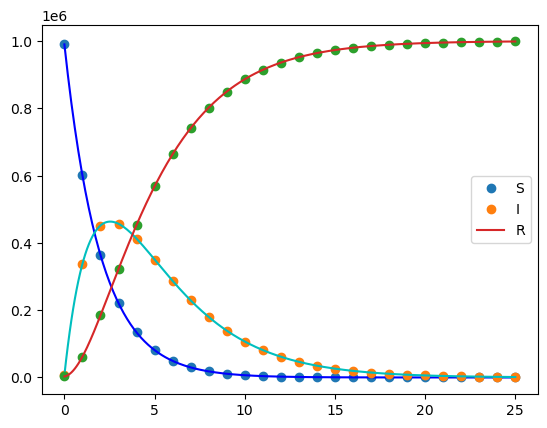

In [27]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0,25

time = np.linspace(t0, tf, 26)
more_time = np.linspace(t0, tf, 260)

def dSdt(t, S):
    return -alpha*S


def dIdt(t, I):
    return alpha * solnS.sol(t) - beta * I


solnS = integrate.solve_ivp(dSdt, (t0, tf), [S], t_eval = time,  dense_output=True)
tS, yS = solnS.t, solnS.y[0]
solnI = integrate.solve_ivp(dIdt, (t0, tf), [I], t_eval = time,   dense_output=True)
tI, yI = solnI.t, solnI.y[0]


yR = [N - yS[i] - yI[i] for i in range(26)]
solnR = interp1d(time, yR, kind='cubic')
tR = time


plt.plot(tS, yS, 'o', label='S')
plt.plot(more_time, solnS.sol(more_time)[0], color='b')
plt.plot(tI, yI, 'o', label='I')
plt.plot(more_time, solnI.sol(more_time)[0], color='c')
plt.plot(tR, yR, 'o')
plt.plot(more_time,solnR(more_time), label = 'R')


plt.legend()
plt.show()